In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons



# Modelos scikit-learn

```
#-------------------------------------------------------------------------------
# Implementação do Modelo logístico
#-------------------------------------------------------------------------------
```
## `from sklearn.linear_model import LogisticRegression`
```
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

```
## `clf = LogisticRegression(max_iter=10000)`
```
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )
```

```
#-------------------------------------------------------------------------------
# Implementação do Modelo Knn
#-------------------------------------------------------------------------------
```
## `from sklearn.neighbors import KNeighborsClassifier`
```
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

```
## `clf = KNeighborsClassifier(n_neighbors=3)`
```
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )
```

# Tratamento de dados

## Imputação de Valores Ausentes ou exclusão.

In [145]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [137]:
print(df.isnull().sum())
df = df.dropna().reset_index(drop=True)
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [146]:
media = df.isnull()
media["sex"].unique()

array([False,  True])

In [148]:
df = sns.load_dataset('penguins')
for col in df.select_dtypes(include=np.number).columns:
  df[col] = df[col].fillna(df[col].mean())
print(df.isnull().sum())

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64


##### ignorar

In [138]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [139]:
df.isnull().sum() / len(df)

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
dtype: float64

In [140]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 344
After 333


In [17]:
df.isnull().sum() / len(df)

male               0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BPMeds             0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
totChol            0.0
sysBP              0.0
diaBP              0.0
BMI                0.0
heartRate          0.0
glucose            0.0
TenYearCHD         0.0
dtype: float64

## Encode --> transformando atributos não numericos

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### `PANDAS`

In [40]:
df_encoded = pd.get_dummies(df, columns=['island', 'sex', 'species'], drop_first=True)
df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,0,1,0,0,0
2,40.3,18.0,195.0,3250.0,0,1,0,0,0
3,NaN,NaN,NaN,NaN,0,1,0,0,0
4,36.7,19.3,193.0,3450.0,0,1,0,0,0


### `Scikit-learn`

In [41]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [149]:
from sklearn.preprocessing import OneHotEncoder

# Cria o OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Aplica o OneHotEncoder nas colunas categóricas
encoder.fit(df[['island', 'sex', 'species']]) ## CUIDADO NÃO FAZER 2 FIT --> tira duas categorias no lugar de uma 
encoded_data = encoder.transform(df[['island', 'sex', 'species']])
# encoded_data = encoder.fit_transform(df[['island', 'sex', 'species']]) ## CUIDADO COM ESSE COMANDO NÃO RECOMENDADO 

# encoded_data
# array([[0., 1., 1., 0., 0., 0.],
#        [0., 1., 0., 0., 0., 0.],
#        [0., 1., 0., 0., 0., 0.],
#        ...,
#        [0., 0., 1., 0., 0., 1.],
#        [0., 0., 0., 0., 0., 1.],
#        [0., 0., 1., 0., 0., 1.]])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Concatena o DataFrame original (sem as colunas categóricas) com o DataFrame codificado
df_encoded = pd.concat([df.drop(['island', 'sex', 'species'], axis=1), encoded_df], axis=1)

df_encoded.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_Male,sex_nan,species_Chinstrap,species_Gentoo
0,39.10000,18.70000,181.000000,3750.000000,0.0,1.0,1.0,0.0,0.0,0.0
1,39.50000,17.40000,186.000000,3800.000000,0.0,1.0,0.0,0.0,0.0,0.0
2,40.30000,18.00000,195.000000,3250.000000,0.0,1.0,0.0,0.0,0.0,0.0
3,43.92193,17.15117,200.915205,4201.754386,0.0,1.0,0.0,1.0,0.0,0.0
4,36.70000,19.30000,193.000000,3450.000000,0.0,1.0,0.0,0.0,0.0,0.0


### Ver caracteristicas do modelo

In [46]:
df.select_dtypes(include='object').columns

Index(['species', 'island', 'sex'], dtype='object')

In [47]:
encoder.feature_names_in_

array(['island', 'sex', 'species'], dtype=object)

### Salvar estimador no computador

In [48]:
import joblib

# Salvando o modelo
joblib.dump(encoder, 'encoder.pkl')

# Recuperando modelo
encoder = joblib.load('encoder.pkl')
encoder.get_feature_names_out()

array(['island_Dream', 'island_Torgersen', 'sex_Male', 'sex_nan',
       'species_Chinstrap', 'species_Gentoo'], dtype=object)

###### Agora podemos aplicar o modelo de ML


In [49]:
df_encoded = df_encoded.dropna()

In [50]:
X = df_encoded.drop(columns=['body_mass_g'])
y = df_encoded['body_mass_g']

model = LinearRegression()
model.fit(X, y)

print("Coeficientes: ", dict(zip(model.feature_names_in_, model.coef_)))
print("Intercept: ", model.intercept_)
print("Score (R2): ", model.score(X, y))

Coeficientes:  {'bill_length_mm': 20.00993836410321, 'bill_depth_mm': 70.52979499482603, 'flipper_length_mm': 15.830902053361005, 'island_Dream': -17.77304154023821, 'island_Torgersen': -24.261509874675646, 'sex_Male': 379.1273438433128, 'sex_nan': -27.055622613129103, 'species_Chinstrap': -270.86894893979826, 'species_Gentoo': 987.6111910851722}
Intercept:  -1544.2586708350282
Score (R2):  0.8723738276892019


## Normalização

In [71]:
loans = pd.DataFrame({'age':[25,35,45,20,35,52,23,40,60,48,33],
                      'loan':[40000,60000,80000,20000,120000,18000,95000,62000,100000,220000,150000],
                      'default':[1,1,1,1,1,1,0,0,0,0,0] }) # 1='yes'

case  = pd.DataFrame({'age':[47],'loan':[142000]})

display(loans)
display(case)

,age,loan,default
0,25,40000,1
1,35,60000,1
2,45,80000,1
3,20,20000,1
4,35,120000,1
5,52,18000,1
6,23,95000,0
7,40,62000,0
8,60,100000,0
9,48,220000,0


,age,loan
0,47,142000


In [72]:
from sklearn.metrics import DistanceMetric


In [73]:
dist = DistanceMetric.get_metric('euclidean') # distancia euclidiana
d = dist.pairwise(loans[['loan']],case[['loan']])

loans['distance'] = d
display(loans.sort_values('distance'))

,age,loan,default,distance
10,33,150000,0,8000.0
4,35,120000,1,22000.0
8,60,100000,0,42000.0
6,23,95000,0,47000.0
2,45,80000,1,62000.0
9,48,220000,0,78000.0
7,40,62000,0,80000.0
1,35,60000,1,82000.0
0,25,40000,1,102000.0
3,20,20000,1,122000.0


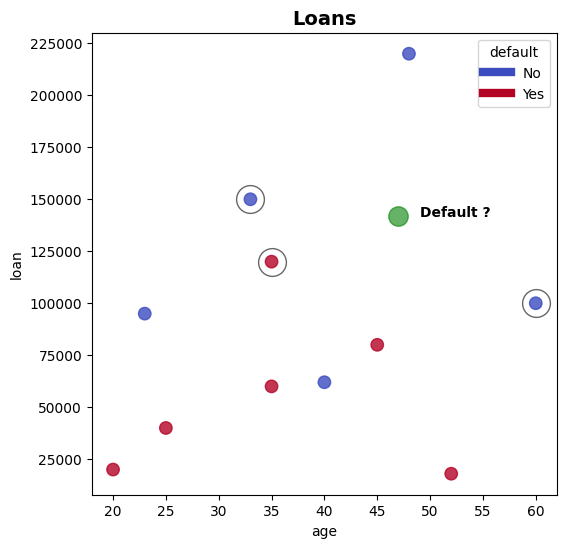

,age,loan,default,distance
10,33,150000,0,8000.0
4,35,120000,1,22000.0
8,60,100000,0,42000.0


In [74]:
k3_neighbors = loans.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.scatter(k3_neighbors.age, k3_neighbors.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors)

In [75]:
from sklearn.preprocessing import minmax_scale

minmax_scale(loans[['age','loan']])

array([[0.125     , 0.10891089],
       [0.375     , 0.20792079],
       [0.625     , 0.30693069],
       [0.        , 0.00990099],
       [0.375     , 0.5049505 ],
       [0.8       , 0.        ],
       [0.075     , 0.38118812],
       [0.5       , 0.21782178],
       [1.        , 0.40594059],
       [0.7       , 1.        ],
       [0.325     , 0.65346535]])

Mas o uso de funções não permite aplicarmos a mesma regra de normalização em outros conjuntos de dados! ---> Não armazena o valor de max e minimo para poder realizar a conversão dos dados que queremos prever por exemplo

In [76]:
minmax_scale(case)

array([[0., 0.]])

Neste caso, é melhor empregarmos um *estimador* do `scikit-learn`. O cálculo é o mesmo da função `minmaxscaler`, mas o uso de um estimador permite salvarmos os parâmetros empregados para a mesma aplicação em outros conjuntos de dados.

> *Na normalização de dados com o `scikit-learn` é preferível uso de estimadores no lugar de funções para que a mesma transformação possa ser efetuada em outros conjuntos de dados. O mesmo princípio se aplica a outras transformações, como os encodes.*

Vamos então aplicar o estimador `MinMaxScaler` no lugar da função.


Se considerarmos que o nosso modelo gera um bom resultado, podemos considerá-lo um modelo eficaz e aplicá-lo para novos casos hipotéticos.

> **Você deve notar agora que, como fizemos uma transformação dos dados das variáveis preditoras precisamos aplicar esta mesma transformação (a normalização!) nos valores dos novos casos. Como empregamos um estimador `scaler`, podemos empregar essa mesma transformação e você pode notar também que, se não tivéssemos empregado um estimador, não saberíamos como aplicar a mesma transformação! Essa a vantagem de empregarmos um estimador para isso!**

In [77]:
# apenas mostrando o resultado do estimador
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
print(scaler.fit(loans[['age','loan']]))

print(scaler.data_max_)

print(scaler.transform(loans[['age','loan']]))
print(scaler.transform(case))

MinMaxScaler()
[6.0e+01 2.2e+05]
[[0.125      0.10891089]
 [0.375      0.20792079]
 [0.625      0.30693069]
 [0.         0.00990099]
 [0.375      0.5049505 ]
 [0.8        0.        ]
 [0.075      0.38118812]
 [0.5        0.21782178]
 [1.         0.40594059]
 [0.7        1.        ]
 [0.325      0.65346535]]
[[0.675      0.61386139]]


In [78]:
# criando os dados normalizados, 'scaled'
loans_scaled = pd.DataFrame(scaler.transform(loans[['age','loan']]),columns=loans.columns[0:2])
loans_scaled = pd.concat([loans_scaled,loans[['default']]],axis=1)
display(loans_scaled)

case_scaled = pd.DataFrame(scaler.transform(case),columns=case.columns[0:2])
display(case_scaled)

,age,loan,default
0,0.125,0.108911,1
1,0.375,0.207921,1
2,0.625,0.306931,1
3,0.000,0.009901,1
4,0.375,0.504950,1
5,0.800,0.000000,1
6,0.075,0.381188,0
7,0.500,0.217822,0
8,1.000,0.405941,0
9,0.700,1.000000,0


,age,loan
0,0.675,0.613861


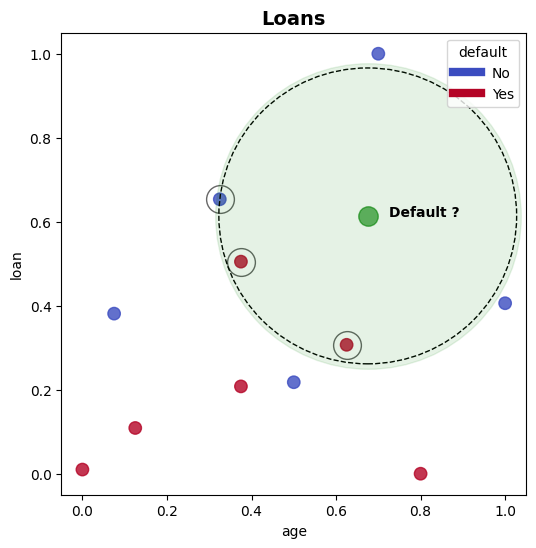

,age,loan,default,distance
2,0.625,0.306931,1,0.310977
4,0.375,0.504950,1,0.319158
10,0.325,0.653465,0,0.352234


In [79]:
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(loans_scaled[['age','loan']],case_scaled[['age','loan']])

loans_scaled['distance'] = d

k3_neighbors_scaled = loans_scaled.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.plot(case_scaled.age, case_scaled.loan, 'go', markersize=220, alpha=0.10)
ax.scatter(k3_neighbors_scaled.age, k3_neighbors_scaled.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans_scaled.age, loans_scaled.loan, c=loans_scaled.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case_scaled.age, case_scaled.loan, 'go', markersize=14, alpha=0.6)

a_circle = plt.Circle((case_scaled.age, case_scaled.loan), k3_neighbors_scaled.distance.max(), edgecolor='k', linestyle='dashed',fill=False)
ax.add_artist(a_circle)

plt.text(case_scaled.age+0.05, case_scaled.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors_scaled)

### 1. **Min-Max Scaling**

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

ou

$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}} \times (\text{range}_{max} - \text{range}_{min}) + \text{range}_{min}
$$

- $X$: valor original.
- $X_{min}$: valor mínimo da variável.
- $X_{max}$: valor máximo da variável.
- $\text{range}_{min}$: limite inferior do intervalo de normalização, por padrão 0.
- $\text{range}_{max}$: limite superior do intervalo de normalização, por padrão 1.

### 2. **Standard Scaling (Z-Score Normalization)**

$$
X_{scaled} = \frac{X - \mu}{\sigma}
$$

- $X$: valor original.
- $\mu$: média da variável.
- $\sigma$: desvio padrão da variável.

### 3. **MaxAbs Scaling**

$$
X_{scaled} = \frac{X}{|X_{max}|}
$$

- $X$: valor original.
- $X_{max}$: valor absoluto máximo da variável.

### 4. **Robust Scaling**

$$
X_{scaled} = \frac{X - \text{median}}{IQR}
$$

- $X$: valor original.
- $\text{median}$: mediana da variável.
- $IQR$: intervalo interquartil (75º percentil - 25º percentil).

### 5. **Normalizer (Norma L2)**

$$
X_{scaled} = \frac{X}{\|X\|}
$$

- $X$: vetor original.
- $\|X\|$: norma L2 (comprimento) do vetor $X$.

In [170]:
df = pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


### Outros nomalizadores

In [171]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Cria os scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Aplica os scalers
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                         columns=['housing_median_age', 'total_bedrooms', 'households'])
df_scale = pd.DataFrame(standard_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                        columns=['housing_median_age', 'total_bedrooms', 'households'])
df_robust = pd.DataFrame(robust_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                         columns=['housing_median_age', 'total_bedrooms', 'households'])


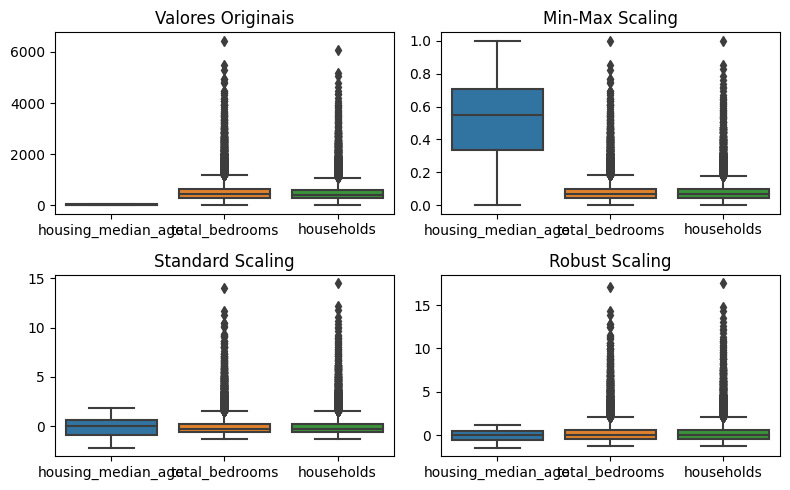

In [172]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))

# Boxplot dos valores originais
sns.boxplot(data=df[['housing_median_age', 'total_bedrooms', 'households']], ax=axes[0, 0])
axes[0, 0].set_title('Valores Originais')

# Boxplot dos valores após Min-Max Scaling
sns.boxplot(data=df_min_max, ax=axes[0, 1])
axes[0, 1].set_title('Min-Max Scaling')

# Boxplot dos valores após Standard Scaling
sns.boxplot(data=df_scale, ax=axes[1, 0])
axes[1, 0].set_title('Standard Scaling')

# Boxplot dos valores após Robust Scaling
sns.boxplot(data=df_robust, ax=axes[1, 1])
axes[1, 1].set_title('Robust Scaling')

plt.tight_layout()
plt.show()


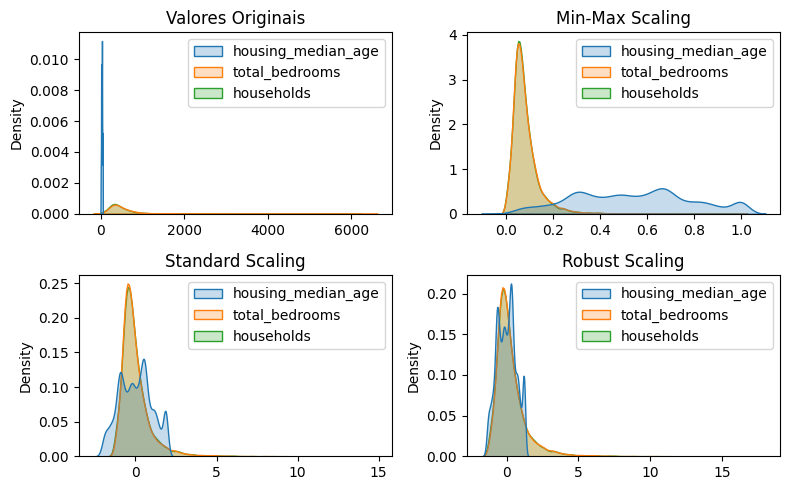

In [173]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))

# Densidade dos valores originais
sns.kdeplot(data=df[['housing_median_age', 'total_bedrooms', 'households']], ax=axes[0, 0], fill=True)
axes[0, 0].set_title('Valores Originais')

# Densidade dos valores após Min-Max Scaling
sns.kdeplot(data=df_min_max, ax=axes[0, 1], fill=True)
axes[0, 1].set_title('Min-Max Scaling')

# Densidade dos valores após Standard Scaling
sns.kdeplot(data=df_scale, ax=axes[1, 0], fill=True)
axes[1, 0].set_title('Standard Scaling')

# Densidade dos valores após Robust Scaling
sns.kdeplot(data=df_robust, ax=axes[1, 1], fill=True)
axes[1, 1].set_title('Robust Scaling')

plt.tight_layout()
plt.show()


### StandardScaler

In [178]:
df = pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [179]:

# Cria os scalers
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Aplica os scalers
df_min_max = pd.DataFrame(min_max_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                         columns=['housing_median_age', 'total_bedrooms', 'households'])

In [181]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

standard_scaler = StandardScaler()


df_scaled = pd.DataFrame(standard_scaler.fit_transform(df[['housing_median_age', 'total_bedrooms', 'households']]),
                        columns=['housing_median_age', 'total_bedrooms', 'households'])


# df_scaled = pd.DataFrame(standard_scaler.fit_transform(df_encoded.drop(columns='species')),
                        #  columns=df_encoded.drop(columns='species').columns)

df_scaled = pd.concat([df['median_house_value'], df_scaled], axis=1)
df_scaled.head()

,median_house_value,housing_median_age,total_bedrooms,households
0,66900.0,-1.079671,1.764204,-0.075998
1,80100.0,-0.761872,3.230441,-0.099404
2,85700.0,-0.920772,-0.866956,-0.999252
3,73400.0,-1.159121,-0.480230,-0.715774
4,65500.0,-0.682422,-0.506328,-0.622148


In [183]:
df_scaled.describe() # a media dos valore normalizados é zero

,median_house_value,housing_median_age,total_bedrooms,households
count,17000.000000,1.700000e+04,1.700000e+04,1.700000e+04
mean,207300.912353,-7.606987e-17,-8.693699e-17,2.006238e-17
std,115983.764387,1.000029e+00,1.000029e+00,1.000029e+00
min,14999.000000,-2.191968e+00,-1.277408e+00,-1.300935e+00
25%,119400.000000,-8.413218e-01,-5.751323e-01,-5.701340e-01
50%,180400.000000,3.262582e-02,-2.500927e-01,-2.398431e-01
75%,265000.000000,6.682241e-01,2.582266e-01,2.705474e-01
max,500001.000000,1.859971e+00,1.401132e+01,1.451402e+01


### Inverse Transform!

In [188]:
standard_scaler.inverse_transform(df_scaled.drop(columns="median_house_value"))

array([[  15., 1283.,  472.],
       [  19., 1901.,  463.],
       [  17.,  174.,  117.],
       ...,
       [  17.,  531.,  456.],
       [  19.,  552.,  478.],
       [  52.,  300.,  270.]])

In [191]:
voltando = pd.DataFrame(standard_scaler.inverse_transform(df_scaled.drop(columns="median_house_value")),
                         columns=df_scaled.drop(columns="median_house_value").columns)
voltando

,housing_median_age,total_bedrooms,households
0,15.0,1283.0,472.0
1,19.0,1901.0,463.0
2,17.0,174.0,117.0
3,14.0,337.0,226.0
4,20.0,326.0,262.0
...,...,...,...
16995,52.0,394.0,369.0
16996,36.0,528.0,465.0
16997,17.0,531.0,456.0
16998,19.0,552.0,478.0


In [192]:
df = pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


### Quando e qual normalização empregar?

> **Preciso normalizar?**
> 1. Quanto menos interferirmos (quanto menos *botamos a mão*) nos dados, melhor
> 2. Nem todos algoritmos empregam os valores e/ou distância e, portanto, a normalização pode não ser necessária
> 3. A preparação dos dados pode envolver outras etapas que podem influenciar no tipo de normalização, como a exclusão de outliers

> **Decidi por normalizar. Que algoritmo empregar?**
> 1. Nenhum algoritmo é *melhor* a priori (ou só teríamos um :-))
> 2. Dependem de muitos fatores como dos dados (outliers, distribuição, valores mínimos e máximos etc.), do modelo de aprendizado e tarefa a ser realizado, função distância empregada etc. também não há uma concordância dos autores sobre técnicas de normalização e modelos a empregar. O melhor, portanto, é experimentar os diferentes métodos e resultados.

De qualquer modo, o Min-Max Scaling é útil para algoritmos sensíveis à escala dos dados e que empregam distância. O Standard Scaling é mais adequado para algoritmos que assumem uma distribuição normal dos dados. Mas ambos são bastante sensíveis a outliers. O Robust Scaling é ideal quando há muitos outliers nos dados, e o Normalizer é mais comum em tarefas de aprendizado não supervisionado, como clustering.

Na prática, os métodos mais comuns empregados são o **Min-Max Scaling** e o **Standard Scaling**.

## Separando os dados de treino e de Teste

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

***O parâmetro stratify=y indica que os conjuntos de treinamento e teste manterão a mesma proporção dos valores do atributo objetivo y. Os parâmetros test_size=0.3 indica o percentual (30%) dos dados que será empregado para teste. Esse valor varia, em geral, de 20-30% dos dados. Por fim, o parâmetro random_state=123 é para a reprodutibilidade dos resultados.***

In [ ]:
from sklearn.datasets import make_moons


In [ ]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

# O parâmetro stratify=y indica que os conjuntos de treinamento e teste manterão a mesma proporção dos valores do atributo objetivo y. Os parâmetros test_size=0.3 indica o percentual (30%) dos dados que será empregado para teste. Esse valor varia, em geral, de 20-30% dos dados. Por fim, o parâmetro random_state=123 é para a reprodutibilidade dos resultados.

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( clf.score(X_test,y_test) )


[0 1 0 0 0 0 1 1 0 1] ...
0.9333333333333333


# Regressão Logística: *Classificador Logístico*


> **Importante: A Regressão Logística é um classificador Binário, isto é, ele só classifica categorias Dicotômicas, como *yes/no*, *true/false*!**

O fato de somente classificar categorias Dicotômicas fica claro quando você pensa que saída do modelo é uma única probabilidade $P$, por exemplo a de ser benigno $P(Y=Benigno)$ e que, portanto, podemos apenas obter agora a probabilidade de não ser benigno,  $P(Y \ne Benigno) = 1 - P(Y = Benigno)$. Isso pode parecer uma grande limitação, mas na verdade você sempre pode dividir um problema multiclasse (Edifícios/Pessoas/Paisagens ou Conservador/Moderado/Agressivo) em vários problemas binários (pense, como você faria isso?).

## Modelo logístico


<img src="https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/blob/main/figuras/linearregressionlogitbreast1.PNG?raw=true" width=1200>

In [5]:
from sklearn.linear_model import LogisticRegression






Para obtermos essas probabilidades, a regressão logística modela o que é conhecido como log de probabilidades:

$$ log( \frac{p}{1-p}) = a_0 + a_1 x_1 + ... + a_n x_n $$

Os resultados da regressão logística vão então informar sobre as chances ('Odds') e razão das chances ('Odds Ratio') e não exatamente probabilidades (por exemplo, em alguns casos os valores podem não ter soma 1), mas podemos entender de qualquer modo que uma *chance* reflete em uma probabilidade maior daquele evento ocorrer. Se um evento tem probabilidade $p$, suas chances são $p / (1-p)$, e é por isso que a esquerda lado é chamado de "odds logarítmicas" ou "logit", e podemos obter a
probabilidade de chances invertendo a função acima:

$$ p = 1 / (1 + e^{- ( a_0 + a_1 x_1 + ... + a_n x_n ) })$$

Essa função é conhecida como  função logística ou sigmóide, $\sigma$, é definida como:


$$\sigma(x)=\frac{1}{1+e^{-x}}$$


Ela tem o seguinte gráfico:



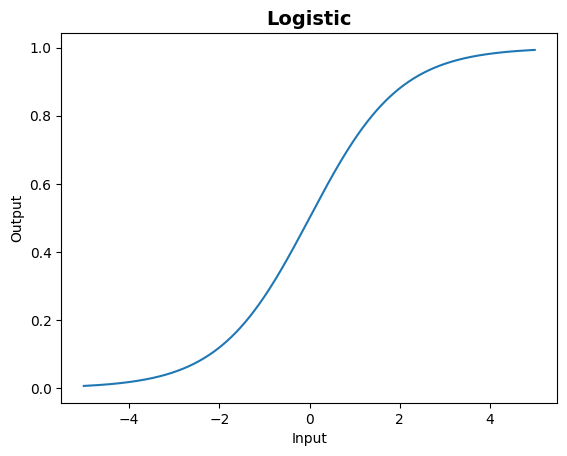

In [2]:
x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))

plt.plot(x,y)
plt.title('Logistic', fontsize=14, weight='bold')
plt.xlabel('Input')
plt.ylabel('Output')

plt.show()

### Dilema Viés-Variância



Parece bastante simples construir esses modelos, mas construir bons modelos pode ser uma tarefa bastante difícil.
Vamos nos deter um pouco mais sobre como podemos avaliar os modelos.  

Vamos começar entendo o que é conhecido como **Dilema Viés-Variância** (ou *Bias–variance tradeoff*).

A capacidade de um modelo de capturar a verdadeira relação entre as variáveis preditoras e a variável objetivo é o que chamamos de viés (*bias*). Um alto erro de viés significa que o modelo não se ajusta aos dados e que, portanto, não consegue representar os dados. No limite ele não está aprendendo nada. É o que chamamos de **subajuste do modelo**, ou *underfitting*. Essa, é claro, é uma situação que não queremos.

Entretanto, ao tentarmos reduzir o erro de viés dos dados podemos nos deparar com um outro problema. Com um viés muito pequeno o modelo poder ficar tão ajustado aos dados de treinamento que falha ao tentar prever novos casos que não faziam parte do conjunto de treinamento. Neste caso, o modelo captura toda a variância dos dados. Você pode entender que o modelo passa a ser muito sensível a diferentes conjuntos de treinamento e erra ao *generalizar* novos casos. Isso é o que chamamos de **subreajuste do modelo**, ou *overfitting*.  

O dilema está, portanto, em obter o ponto de equilíbrio entre o subajuste e sobreajuste dos dados.



Automatically created module for IPython interactive environment


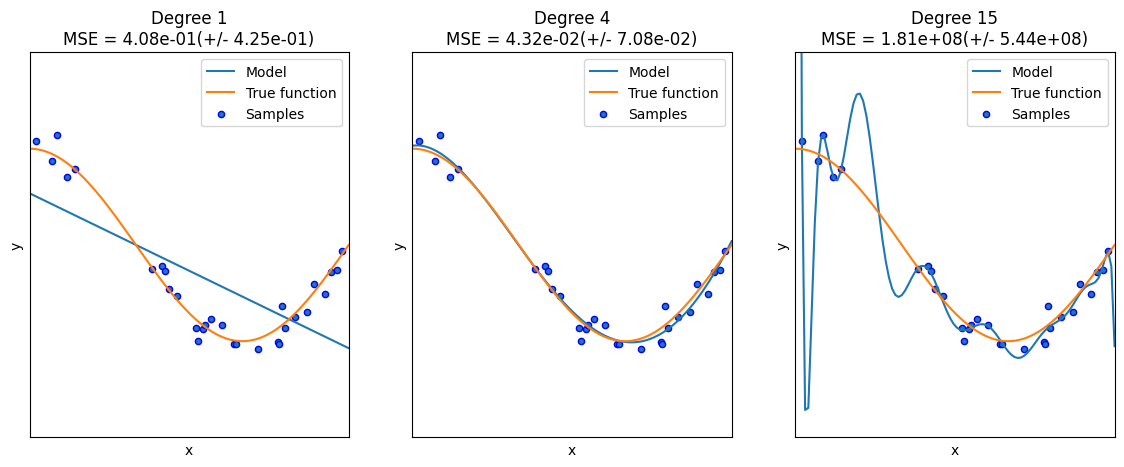

In [32]:
# fonte: https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/SobreESubAjuste.png?raw=true)


<small>
<b>
Figura 7. Exemplos de underfitting e overfitting (Produzido com https://ml-playground.com/#)

### Diminuido o risco de *Overfitting*: Conjuntos de Treinamento e Teste

Aprender ou treinar parâmetros de um modelo de predição e testá-lo com os mesmos dados é um erro de método. É como dar uma prova para avaliar o conhecimento de um aluno somente com exercícios que já foram dados previamente na sala da aula.  Seria um modelo que apenas repete os rótulos das amostras podendo ser perfeito nesses dados, mas sem grande utilidade para predição de novos casos (sobreajuste).

Para evitar o sobreajuste, temos que definir dois conjuntos diferentes de dados a partir dos dados originais, um conjunto de Treinamento e um conjunto de Teste:

* O *conjunto de treinamento* `X_train`, `y_train` será a parte dos dados que empregada para o treinamento dos parâmetros do modelo

* O *conjunto de teste* `X_test`, `y_test` será a parte dos dados que empregada para avaliar o modelo preditivo ajustado

Essa divisão do conjunto original de dados deve ser aleatória (*por que?*) e pode ser obtida com o `scikit-learn` empregando-se a função `train_test_split()`. Seguiremos daqui em diante somente analisando modelos de classificação.

Vamos então aplicar essa abordagem mais correta ao nosso conjunto de dados *Moons*.




![imagem](https://github.com/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/figuras/TrainTest.png?raw=true)

### Acuracidade: Cuidado e Outras Métricas



Até aqui nossos resultados parecem serem muito bons, com acuracidades acima de 0.8 mesmo quando medida sobre o conjunto de teste.

Mas uma boa acuracidade geral (simplesmente o percentual total de acertos), pode não ser suficiente para produzir bons modelos e pode mesmo, mascarar modelos bastante ruins.

Veja este exemplo, um problema bastante comum de classes desbalanceadas,

| Real/Pred | Maligno | Benigno |
|-|-|-|
| Maligno | 1 | 2 |
| Benigno | 0 | 97 |

A matriz acima é chamada de **matriz de confusão**. Ela apresenta nas linhas os valores reais dos dados e nas colunas as predições. São assim 3 casos reais de casos Malignos, mas apenas 1 foi classificado  corretamente e 2 desses casos foram classificados como benignos. Já os 97 benignos foram todos classificados corretamente. O modelo tem, portanto, acuracidade de 99%!!! ($2+97=$ total de casos classificados corretamente). Entretanto, é fácil ver, o modelo falha miseravelmente ao prever os casos Malignos (acerta apenas 33% desses casos), trazendo um grande risco aos pacientes. É um mal modelo apesar da alta acuracidade geral, e você pode notar que um modelo *trivial* que atribuísse à TODOS os casos a classe 'benigno', já daria uma acuracidade de 97%.

Felizmente, para nós seres humanos, as amostras de tumores malignos é bastante menor que de casos benignos, assim como são bastante menos comuns os casos de fraude ou de e-mails spam, mas classes desbalanceadas como nesses casos representam um grande desafio para o Aprendizado de Máquina.

Esse é o gancho para, na próxima aula, verificarmos outras métricas dos modelos de classificação.


ACURACIDADE ALTA E DADOS DESBALANCEADOS É PESSIMO ASSIM COMO SE A CHUTAMOS SEMPRE CLASSE A EM UM CONJUNTO 50 50 APARECE TER UM ACERTO DE 50%

## Pratica

In [6]:
from sklearn.linear_model import LogisticRegression


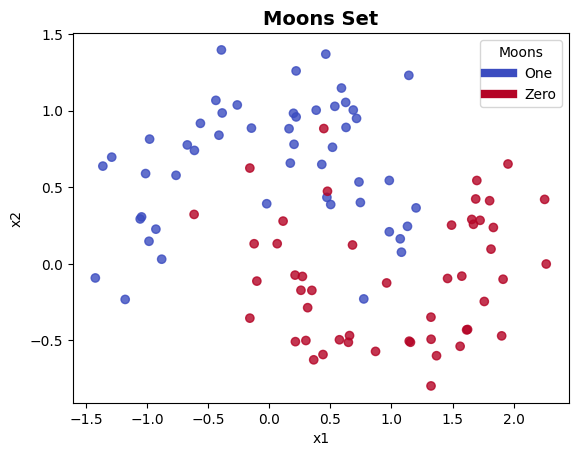

         x1        x2  y
0 -0.763251  0.577354  0
1 -0.391942  1.395641  0
2  1.324561 -0.492319  1
3  0.271295 -0.082532  1
4  2.253887  0.420281  1


In [3]:
from sklearn.datasets import make_moons
cmap_data = plt.cm.coolwarm

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)

df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

print(df.head())

In [5]:

# Definir entradas e saidas do modelo

X = df[['x1','x2']]
y = df.y

#Criar modelo
# clf = LogisticRegression()

clf = LogisticRegression(max_iter=1000)
print(clf)

# Treinar modelo
clf.fit(X,y)
print( clf.coef_, clf.intercept_)

# Prever baseado no modelo

y_pred = clf.predict(X)
print(y_pred) 



# Predição para um caso especifico
X_new = pd.DataFrame({'x1': [ -0.763251  ], 'x2': [0.577354]})
y_pred_case = clf.predict(X_new)

# print(5*'\n' + 'x = ' , X_new, '\npredição = ', y_pred_case)
print('x = ' , X_new, '\npredição = ', y_pred_case)




# Acuracidade
print(sum(y_pred == y) / len(y))

print(y_pred_case)

LogisticRegression(max_iter=1000)
[[ 1.21523438 -2.60803724]] [0.12484869]
[0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1
 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0]
x =           x1        x2
0 -0.763251  0.577354 
predição =  [0]
0.87
[0]


In [6]:
print(clf.coef_, clf.intercept_)

[[ 1.21523438 -2.60803724]] [0.12484869]


Ainda existem outros preditores úteis que retornam a probabilidade ou o log da probabilidade de cada classe, o que é  útil quando se deseja refinar os resultados ou ainda desejamos empregar esses valores para solução de problemas multiclasse.

In [12]:
clf.predict_proba(X)[0:10]

array([[0.90957378, 0.09042622],
       [0.98186015, 0.01813985],
       [0.04659762, 0.95340238],
       [0.33854573, 0.66145427],
       [0.14582354, 0.85417646],
       [0.14251362, 0.85748638],
       [0.03145696, 0.96854304],
       [0.91387591, 0.08612409],
       [0.96036923, 0.03963077],
       [0.87472292, 0.12527708]])

In [16]:
clf.predict_proba(X)[1][0] + clf.predict_proba(X)[1][1]

1.0

In [17]:
clf.predict_log_proba(X)[0:10]

array([[-0.09477916, -2.40322103],
       [-0.01830639, -4.00964435],
       [-3.06620578, -0.04771824],
       [-1.08309611, -0.41331442],
       [-1.925358  , -0.15761748],
       [-1.94831768, -0.15374999],
       [-3.45913493, -0.03196236],
       [-0.09006048, -2.45196614],
       [-0.04043746, -3.22814934],
       [-0.13384811, -2.07722732]])

In [10]:
#Erros
sum(y != y_pred)

13

## Metricas de Avaliação do Modelo

### Acuracidade

medida de eficiência do modelo => equivalente ao R-Square da regressão linear

In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, y_pred)
print('\nScore de Acuracidade (modo 1):\n')
print(accuracy)

accuracy = clf.score(X, y)
print('\nScore de Acuracidade (modo 2):\n')
print(accuracy)


Score de Acuracidade (modo 1):

0.87

Score de Acuracidade (modo 2):

0.87


In [8]:
clf.score(X,y)  #percentual de acerto do nosso modelo quando comparamos com os rótulos (as respostas) presentes no nosso conjunto.

0.87

In [9]:
sum( clf.predict(X) == y ) / len(X)

0.87

In [21]:
df['y_pred'] = clf.predict(X)
df['prediction'] = df['y_pred'] == df['y']
df


,x1,x2,y,y_pred,prediction
0,-0.763251,0.577354,0,0,True
1,-0.391942,1.395641,0,0,True
2,1.324561,-0.492319,1,1,True
3,0.271295,-0.082532,1,1,True
4,2.253887,0.420281,1,1,True
...,...,...,...,...,...
95,1.491966,0.252394,1,1,True
96,-0.159110,0.624741,1,0,False
97,-1.289734,0.695981,0,0,True
98,1.575789,-0.080554,1,1,True


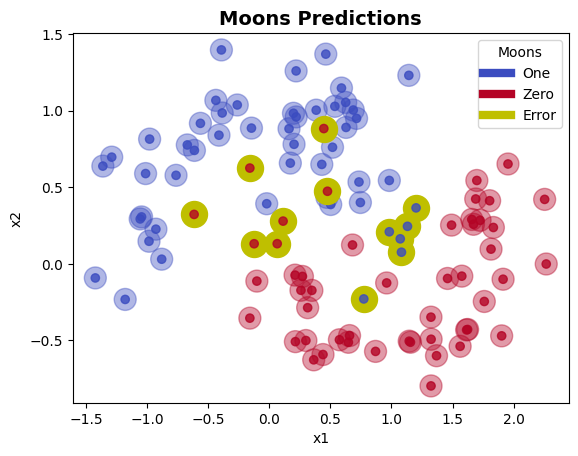

In [22]:
cmap_data = plt.cm.coolwarm

y_pred = clf.predict(X)

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.8)
plt.scatter(X.x1, X.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.4)

plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X[y_pred != y].x1, X[y_pred != y].x2, c=y[y_pred != y], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



E podemos ainda verificar a *fronteira de decisão* do estimador.

/home/anamarcacini/.local/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


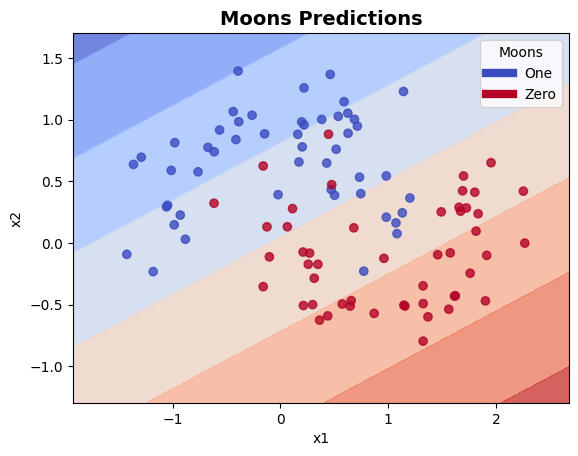

In [23]:
x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

if hasattr(clf, "decision_function"):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.8)
plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]

plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

#### Problema da Acuracia

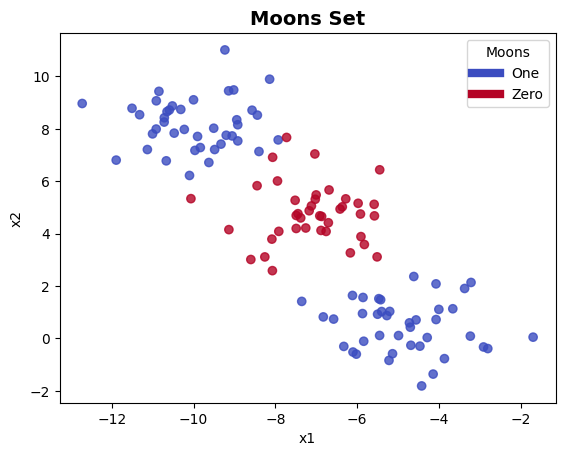

         x1        x2  y
0 -5.422578  1.477418  0
1 -5.270181  0.872708  0
2 -2.800484 -0.387307  0
3 -8.064956  6.915338  1
4 -6.111296  1.640534  0


In [18]:
from sklearn.datasets import make_moons, make_blobs
cmap_data = plt.cm.coolwarm

X, y = make_blobs(n_samples=120, n_features=2, random_state=12)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
df.y = df.y.replace(1,2)
df.y = df.y.replace(0,1)
df.y = df.y.replace(2,0)

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Moons Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Moons')

plt.show()

print(df.head())

In [19]:
df.y.value_counts()

0    80
1    40
Name: y, dtype: int64

In [20]:
#### TENTANDO COM O CLASSIFICADOR LOGÍSTICO

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['x1','x2']]
y = df.y

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=1000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )


[1 0 0 0 0 0 0 0 0 0] ...
0.69


In [21]:
sum(y_test != y_pred)

11

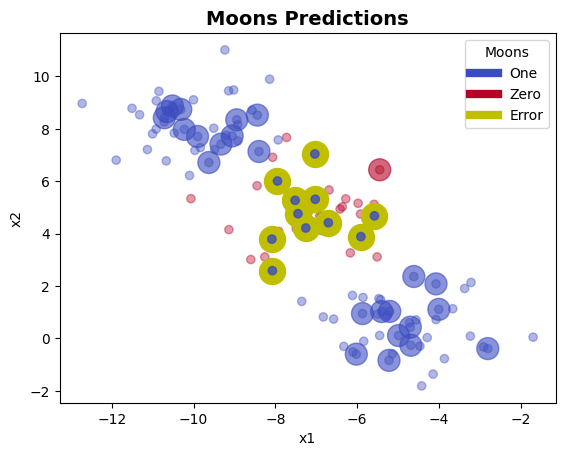

In [22]:
cmap_data = plt.cm.coolwarm

plt.scatter(X.x1, X.x2, c=y, cmap=cmap_data, alpha=0.4) # todos dados
plt.scatter(X_test.x1, X_test.x2, c=y_pred, s=250,cmap=cmap_data, alpha=0.6) # somente dados de teste

plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, color='y', s=350, alpha=1, label='wrong predictions')
plt.scatter(X_test[y_pred != y_test].x1, X_test[y_pred != y_test].x2, c=y_test[y_pred != y_test], cmap=cmap_data, alpha=0.8)
plt.title('Moons Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6),
                Line2D([0], [0], color='y', lw=6)]
plt.legend(custom_lines, ['One', 'Zero', 'Error'], loc='upper right',title='Moons')

plt.show()



## Exemplo Pratico

### tratamento de dados

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [97]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


### Criação treinamento e previsão do modelo

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
y = df.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = LogisticRegression(max_iter=10000)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

[0 0 1 0 0 0 0 0 0 0] ...
0.85


### Metricas do Modelo

In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[920  11]
 [153  14]]

Score de Acuracidade (1):

0.85

Score de Acuracidade (2):

0.85

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       931
           1       0.56      0.08      0.15       167

    accuracy                           0.85      1098
   macro avg       0.71      0.54      0.53      1098
weighted avg       0.81      0.85      0.80      1098




Como você pode ver, apesar da acuracidade de $0.85$ do nosso modelo, ele acerta apenas pouco mais que uma moeda ($0.5$ é são as chances de cara ou coroa),  $0.56$, dos casos positivos de doença. Além disso apenas 0.08 dos casos de doença foram identificados pelo modelo. Esses dois valores se refletem também baixo F1-score médio desse modelo. Este é, portanto, um péssimo modelo se o objetivo é identificar pacientes em risco!

## Cuidado com a Regressão Lógistica

         x1        x2  y
0  0.401331  0.885831  0
1 -0.234227 -0.844913  1
2  0.678022  0.334662  1
3  0.969801 -0.232501  0
4  0.100768 -0.821603  1


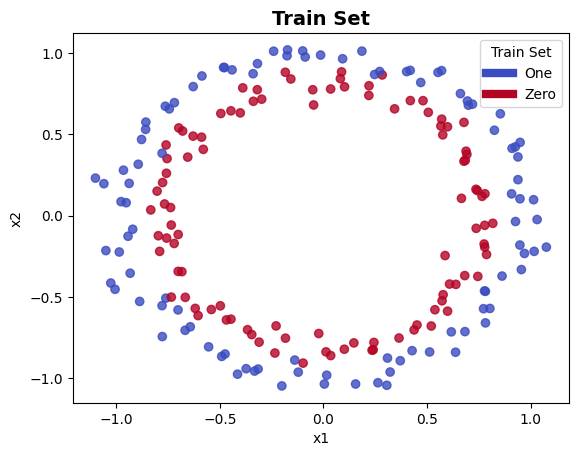

In [52]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, factor=0.8, noise=0.05, random_state=0)
df = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
print(df.head())

plt.scatter(df.x1, df.x2, c=df.y, cmap=cmap_data, alpha=0.8)
plt.title('Train Set',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Train Set')

plt.show()



In [53]:
from sklearn.linear_model import LogisticRegression

# Definição
clf = LogisticRegression()

# Treinamento
clf.fit(X,y)

# Avaliação
y_pred = clf.predict(X)

# Acuracidade
print(sum(y_pred == y) / len(y))

0.495


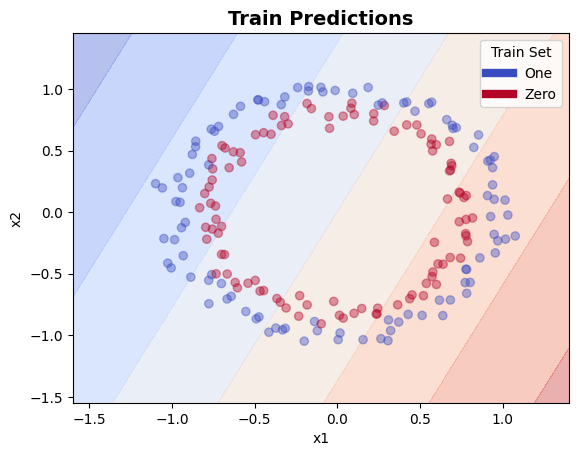

In [54]:
X = df
x_min, x_max = X['x1'].min() - .5, X['x1'].max() + .5
y_min, y_max = X['x2'].min() - .5, X['x2'].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

if hasattr(clf, "decision_function"):
  Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
  Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cmap_data, alpha=0.4)
plt.scatter(X['x1'], X['x2'], c=y, cmap=cmap_data, alpha=0.4)
plt.title('Train Predictions',weight='bold',fontsize=14)
plt.xlabel("x1")
plt.ylabel("x2")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]

plt.legend(custom_lines, ['One', 'Zero'], loc='upper right',title='Train Set')

plt.show()

# K-Vizinhos Mais Próximos


## Teoria


O K-Vizinhos mais Próximos, ou Knn (do inglês, K nearest neighbors) é um dos modelos mais simples de classificação, mas também bastante empregado. Seu funcionamento se baseia em um princípio muito simples que nós mesmos adotamos frequentemente no dia a dia, nós, por exemplo, nos assemelhamos às pessoas mais próximas de nós. Assim, é razoável supor que podemos classificar uma instância de acordo com a classe de seus vizinhos mais próximos.

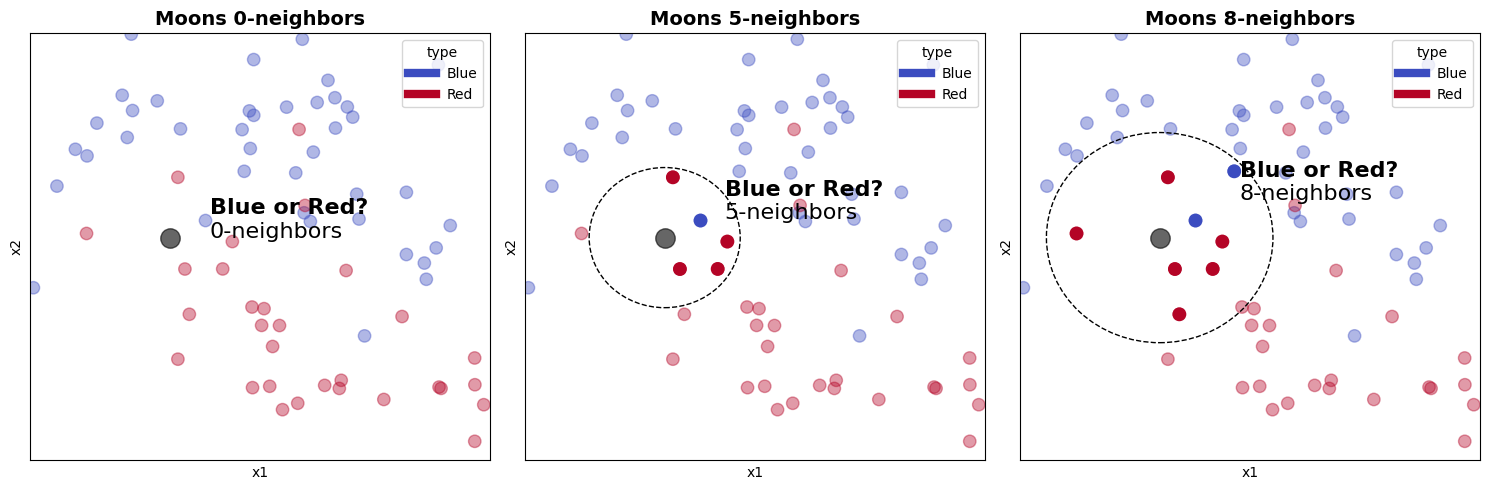

In [152]:
# you can skip this code!

from sklearn.datasets import make_moons
from sklearn.metrics import DistanceMetric
cmap_data = plt.cm.coolwarm

X, y = make_moons(n_samples=100, noise=0.25, random_state=1234)
moons = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})

X, y = make_moons(n_samples=1, noise=0.25, random_state=123)
# amoon = pd.DataFrame({'x1':X[:, 0], 'x2':X[:, 1], 'y':y})
amoon = pd.DataFrame({'x1':[-.2], 'x2':[.3]})

dist = DistanceMetric.get_metric('euclidean')
moons['distance'] = dist.pairwise(moons[['x1','x2']],amoon[['x1','x2']])

f, ax = plt.subplots(1,3,figsize=(15,5))
cmap_data = plt.cm.coolwarm

for i in range(3):
  neighbors = moons.nsmallest([0,5,8][i],'distance')
  ax[i].scatter(moons.x1, moons.x2, c=moons.y, cmap=cmap_data, alpha=0.4, s=80)
  ax[i].scatter(neighbors.x1, neighbors.x2, c=neighbors.y, cmap=cmap_data, s=80)
  ax[i].plot(amoon.x1, amoon.x2, 'ko', markersize=14, alpha=0.6)

  a_circle = plt.Circle((amoon.x1, amoon.x2), neighbors.distance.max()+0.05, edgecolor='k', linestyle='dashed',fill=False)
  ax[i].add_artist(a_circle)

  ax[i].text(amoon.x1+0.2+i/10, amoon.x2+i/10,'Blue or Red?\n', weight='bold', fontsize=16)
  ax[i].text(amoon.x1+0.2+i/10, amoon.x2+i/10,' \n' + str([0,5,8][i]) + '-neighbors', fontsize=16)
  ax[i].set_title('Moons ' + str([0,5,8][i]) + '-neighbors',weight='bold',fontsize=14)
  ax[i].set_xlabel("x1")
  ax[i].set_ylabel("x2")

  custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                  Line2D([0], [0], color=cmap_data(1.), lw=6)]
  ax[i].legend(custom_lines, ['Blue', 'Red'], loc='upper right',title='type')

  ax[i].set_xlim([-0.9,1.4])
  ax[i].set_ylim([-0.9,1.4])
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  # ax[i].axis('equal')

plt.tight_layout()
plt.show()


O número k define quantos vizinhos queremos empregar na classificação. No exemplo acima, considerando 5 vizinhos, você pode verificar que há uma chance de $4/5$ de que a moon *cinza* seja uma moon *red*, e com 8 vizinhos a chance é de $6/8 = 3/4$ de ser *red*. Assim, assumimos nos dois casos a classe *red* para prever a classe do ponto selecionado.

In [153]:
loans = pd.DataFrame({'age':[25,35,45,20,35,52,23,40,60,48,33],
                      'loan':[40000,60000,80000,20000,120000,18000,95000,62000,100000,220000,150000],
                      'default':[1,1,1,1,1,1,0,0,0,0,0] }) # 1='yes'

case  = pd.DataFrame({'age':[47],'loan':[142000]})

display(loans)
display(case)

,age,loan,default
0,25,40000,1
1,35,60000,1
2,45,80000,1
3,20,20000,1
4,35,120000,1
5,52,18000,1
6,23,95000,0
7,40,62000,0
8,60,100000,0
9,48,220000,0


,age,loan
0,47,142000


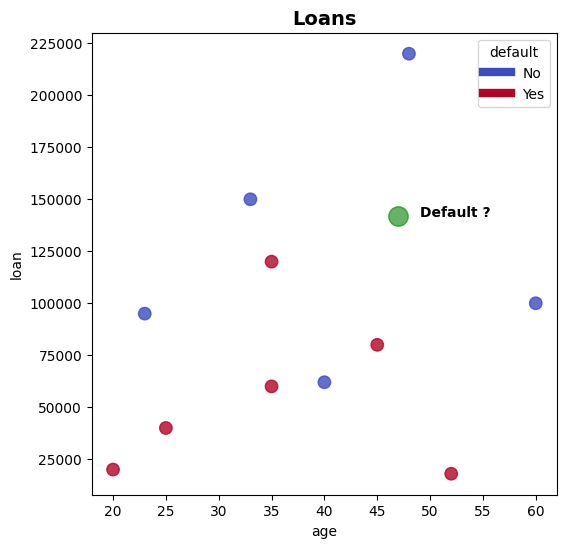

In [154]:
f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()


In [155]:
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
d = dist.pairwise(loans[['age','loan']],case[['age','loan']])

loans['distance'] = d
display(loans.sort_values('distance'))

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012
6,23,95000,0,47000.006128
2,45,80000,1,62000.000032
9,48,220000,0,78000.000006
7,40,62000,0,80000.000306
1,35,60000,1,82000.000878
0,25,40000,1,102000.002373
3,20,20000,1,122000.002988


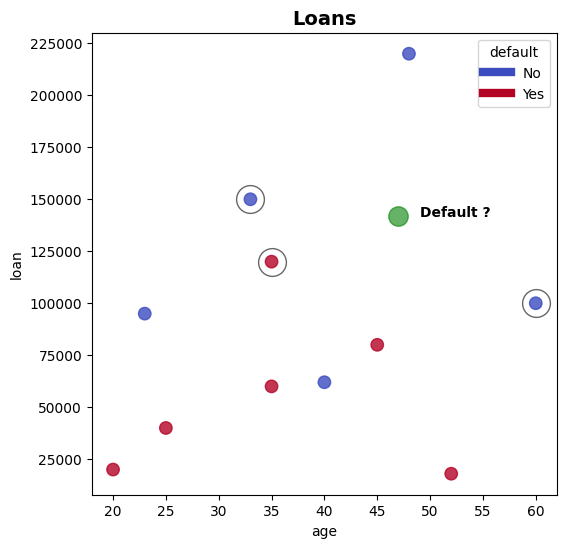

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012


In [156]:
k3_neighbors = loans.nsmallest(3,'distance')

f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.scatter(k3_neighbors.age, k3_neighbors.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors)

## IMPORTANTE NORMALIZAR OS DADOS --> o atributo loans tem maior peso que o age assim a distancia de loans é mais valida que a de age

In [157]:
dist = DistanceMetric.get_metric('euclidean') # distancia euclidiana
d = dist.pairwise(loans[['loan']],case[['loan']])

loans['distance_loans'] = d
display(loans.sort_values('distance'))

,age,loan,default,distance,distance_loans
10,33,150000,0,8000.012250,8000.0
4,35,120000,1,22000.003273,22000.0
8,60,100000,0,42000.002012,42000.0
6,23,95000,0,47000.006128,47000.0
2,45,80000,1,62000.000032,62000.0
9,48,220000,0,78000.000006,78000.0
7,40,62000,0,80000.000306,80000.0
1,35,60000,1,82000.000878,82000.0
0,25,40000,1,102000.002373,102000.0
3,20,20000,1,122000.002988,122000.0


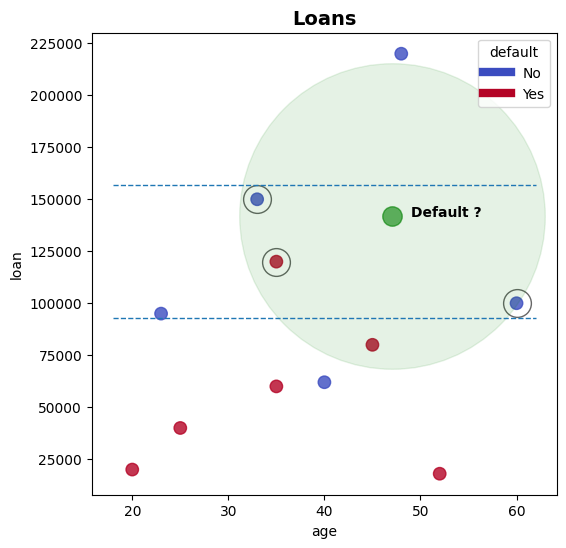

,age,loan,default,distance
10,33,150000,0,8000.012250
4,35,120000,1,22000.003273
8,60,100000,0,42000.002012


In [158]:
f, ax = plt.subplots(1,1,figsize=(6,6))
cmap_data = plt.cm.coolwarm

ax.plot(case.age, case.loan, 'go', markersize=220, alpha=0.10)
ax.scatter(k3_neighbors.age, k3_neighbors.loan, edgecolors='k', c='w', alpha=0.6, s=400)
ax.scatter(loans.age, loans.loan, c=loans.default, cmap=cmap_data, alpha=0.8, s=80)
ax.plot(case.age, case.loan, 'go', markersize=14, alpha=0.6)

plt.hlines(157000,18,62,linestyles='dashed',lw=1)
plt.hlines(93000,18,62,linestyles='dashed',lw=1)

plt.text(case.age+2, case.loan,'Default ?', weight='bold')
plt.title('Loans',weight='bold',fontsize=14)
plt.xlabel("age")
plt.ylabel("loan")

custom_lines = [Line2D([0], [0], color=cmap_data(0.), lw=6),
                Line2D([0], [0], color=cmap_data(1.), lw=6)]
plt.legend(custom_lines, ['No', 'Yes'], loc='upper right',title='default')

plt.show()

display(k3_neighbors)

## Prática

In [159]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler

X = loans[['age','loan']]
y = loans.default

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
case_scaled = scaler.transform(case)

clf = neighbors.KNeighborsClassifier(n_neighbors = 3)

clf.fit(X, y)

y_pred = clf.predict(case_scaled)

default_pred = ['No','Yes'][y_pred[0]]
print('Default? ', default_pred)

Default?  Yes


In [160]:
clf.score(X,y) # Acuracia

0.7272727272727273

#### Importando DF

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/TarekDib03/Analytics/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv')
df.head(1)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0


#### Tratando os dados

In [84]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 4240
After 3658


### Normalização dos dados + Separação dos dados em treino e teste + Criação do modelo + treinamento e predição

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df.drop(columns=['TenYearCHD'])
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
y = df.TenYearCHD

X_train, X_test, y_train, y_test = \
train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = KNeighborsClassifier(n_neighbors = 3)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print( y_pred[0:10], '...' )
print( f'{clf.score(X_test,y_test):.2f}' )

[0 0 1 0 0 0 0 0 1 0] ...
0.82


### Métricas

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[865  66]
 [136  31]]

Score de Acuracidade (1):

0.82

Score de Acuracidade (2):

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       931
           1       0.32      0.19      0.23       167

    accuracy                           0.82      1098
   macro avg       0.59      0.56      0.57      1098
weighted avg       0.78      0.82      0.79      1098



### Previsões

In [98]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [103]:
case = pd.DataFrame( df.drop(columns=['TenYearCHD']).iloc[0]).transpose()
print(f"Resposta : {df['TenYearCHD'].iloc[0]}")
case

Resposta : 0


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0


In [104]:
# Normalizar

case = scaler.transform(case)
case

array([[1.        , 0.18421053, 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16837782,
        0.10638298, 0.23280423, 0.27702375, 0.36363636, 0.10451977]])

In [105]:
clf.predict(case)

array([0])

#### Quantile

Se considerarmos 0.82 um bom resultado, esse é um bom modelo e podemos então aplicá-lo  para novos casos do mesmo modo que fizemos antes com o classificador logístico (aula anterior). Por exemplo, podemos fazer predição para pacientes homens e mulheres hipotéticos em que todos os indicadores estejam no percentil 0.75.

> **Você deve notar agora que, como fizemos uma transformação dos dados das variáveis preditoras precisamos aplicar esta mesma transformação (a normalização!) nos valores dos novos casos. Como empregamos um estimador `scaler`, podemos empregar essa mesma transformação e você pode notar também que, se não tivéssemos empregado um estimador, não saberíamos como aplicar a mesma transformação! Essa a vantagem de empregarmos um estimador para isso!**

In [87]:
df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75)

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,,,,,,,,,,,,,,
0,56.0,3.0,1.0,10.0,0.0,0.0,1.0,0.0,268.0,146.0,89.0,27.71,85.0,86.0
1,56.0,3.0,1.0,20.0,0.0,0.0,1.0,0.0,259.0,141.0,90.0,28.30,80.0,87.0


In [88]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.75) ).reset_index()

X_new = scaler.transform(X_new)
X_new


array([[0.        , 0.63157895, 0.66666667, 1.        , 0.14285714,
        0.        , 0.        , 1.        , 0.        , 0.31827515,
        0.29550827, 0.43386243, 0.2949588 , 0.41414141, 0.1299435 ],
       [1.        , 0.63157895, 0.66666667, 1.        , 0.28571429,
        0.        , 0.        , 1.        , 0.        , 0.29979466,
        0.27186761, 0.44444444, 0.30925836, 0.36363636, 0.13276836]])

In [89]:
clf.predict(X_new)

array([0, 0])

Como no modelo logístico esses pacientes não apresentam risco segundo nosso modelo e você pode verificar outros percentis, como o percentil 0.9 em que já estimamos o risco para pacientes do sexo masculino.

In [90]:
X_new = pd.DataFrame( df.drop(columns=['TenYearCHD']).groupby('male').quantile(0.90) ).reset_index()

X_new = scaler.transform(X_new)
clf.predict(X_new)

array([0, 1])

# Metricas De Problemas de Classificação

## Matriz de Confusão

In [125]:
import pandas as pd

# Criando os dados da matriz de confusão com as siglas
data = [
    ['TP', 'FN'],  
    ['FP', 'TN']   
]

# Criando um DataFrame com dois níveis de cabeçalhos
df_confusion = pd.DataFrame(data, 
                            columns=pd.MultiIndex.from_tuples(
                                [('Valor Previsto', 'Positivo'), ('Valor Previsto', 'Negativo')]
                            ),
                            index=pd.MultiIndex.from_tuples(
                                [('Valor Real', 'Positivo'), ('Valor Real', 'Negativo')]
                            ))

# df_confusion

# Função para aplicar cores conforme o tipo de previsão
def color_confusion(val):
    if val == 'TP':
        color = 'green'
    elif val == 'FP':
        color = 'red'
    elif val == 'FN':
        color = 'gray'
    elif val == 'TN':
        color = 'blue'
    else:
        color = 'white'
    return f'background-color: {color}'
# Aplicando o estilo com as cores
styled_df = df_confusion.style.applymap(color_confusion)

# Exibindo o DataFrame estilizado
styled_df


In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('\nScore de Acuracidade (1):\n')
print(f'{accuracy:.2f}')

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade (2):\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Matriz de Confusão:

[[865  66]
 [136  31]]

Score de Acuracidade (1):

0.82

Score de Acuracidade (2):

0.82

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       931
           1       0.32      0.19      0.23       167

    accuracy                           0.82      1098
   macro avg       0.59      0.56      0.57      1098
weighted avg       0.78      0.82      0.79      1098



Dessa matriz saem todos os valores e métricas úteis para a análise dos resultados. Particularmente, interessam os valores:

* **Verdadeiro positivo (TP)**, em que valor previsto corresponde ao valor real, isto é o valor real era positivo e o modelo previu um valor positivo

* **Verdadeiro negativo (TN)**, em que o valor real era negativo e o modelo previu um valor negativo também corretamente

* **Falso Positivo (FP)**, Ou **Erro Tipo 1**, em que o valor real era negativo, mas o modelo previu um valor positivo. É o caso em que o modelo é **superestimado**, gerando falsos alarmes.

* **Falso negativo (FN)**, Ou **Erro tipo 2**, em que o valor real era positivo, mas o modelo previu um valor negativo. É o caso em que o modelo é **substimado**, gerando perda de casos positivos.



In [ ]:
TP, FP, FN, TN = cm.T.ravel()
print('\nTP = ', TP, '\nFP = ', FP, '\nFN = ', FN, '\nTN = ', TN)


TP =  24 
FP =  11 
FN =  0 
TN =  1


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')

print('\t\t\t    y_pred \n')
print('\t\t\t 0 \t 1')
print('\t\t' + 29*'-')
print('\t\t  0  | \t ' + 'TP=' + str(cm[1,1]) + '\t' + 'FN=' + str(cm[1,0]) + '    |  ' + str(cm[1,0] + cm[1,1]))
print('      y_test  \t  1  | \t ' + 'FP=' + str(cm[0,1]) + '\t' + 'TN=' + str(cm[0,0]) + '    |  ' + str(cm[0,0] + cm[0,1]))

print('\t\t' + 29*'-')
print('\t\t     | \t ' + str(cm[0,1] + cm[1,1]) + '\t' + str(cm[0,0] + cm[1,0]) + '       |  ')


Matriz de Confusão:

			    y_pred 

			 0 	 1
		-----------------------------
		  0  | 	 TP=24	FN=0    |  24
      y_test  	  1  | 	 FP=11	TN=1    |  12
		-----------------------------
		     | 	 35	1       |  


In [ ]:
results = pd.concat([ X_test,y_test], axis=1)
results['y_pred'] = y_pred
results['Igual?'] =  y_pred == y_test
results

,x1,x2,y,y_pred,Igual?
34,-5.445509,6.437457,1,1,True
43,-4.610938,2.364080,0,0,True
23,-8.071103,2.587660,1,0,False
35,-5.866169,0.949079,0,0,True
44,-5.904228,3.887125,1,0,False
101,-4.067622,2.082736,0,0,True
11,-6.701767,4.416635,1,0,False
50,-9.328387,7.418267,0,0,True
10,-5.200051,1.031011,0,0,True
100,-10.715177,8.424962,0,0,True


In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=[1,0])
print('\nMatriz de Confusão:\n')

print('\t\t\t    y_pred \n')
print('\t\t\t 0 \t 1')
print('\t\t' + 29*'-')
print('\t\t  0  | \t ' + str(cm[1,1]) + '\t' + str(cm[1,0]) + '    |  ' + str(cm[1,0] + cm[1,1]))
print('      y_test  \t  1  | \t ' + str(cm[0,1]) + '\t' + str(cm[0,0]) + '    |  ' + str(cm[0,0] + cm[0,1]))

print('\t\t' + 29*'-')
print('\t\t     | \t ' + str(cm[0,1] + cm[1,1]) + '\t' + str(cm[0,0] + cm[1,0]) + '   |  ')




Matriz de Confusão:

			    y_pred 

			 0 	 1
		-----------------------------
		  0  | 	 24	0    |  24
      y_test  	  1  | 	 11	1    |  12
		-----------------------------
		     | 	 35	1   |  


In [ ]:
print( (y_test == 1).sum(), (y_test == 0).sum() )
print( (y_pred == 1).sum(), (y_pred == 0).sum() )

12 24
1 35


In [ ]:
y_test.value_counts()

0    24
1    12
Name: y, dtype: int64

In [ ]:
np.unique(y_pred, return_counts=True)

(array([0, 1]), array([35,  1]))

In [ ]:

print( ( y_test + y_pred == 2 ).sum() ) # ambos 1
print( ( y_test + y_pred == 0 ).sum() ) # ambos 0

1
24


##### Acuracia

$$ Accuracy = \frac{TP+TN}{TP+FP+TN+FN} $$
$$ Accuracy = \frac{Total de Acertos}{Total de Casos} $$

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('\nMatriz de Confusão:\n')
print(cm)

TP, FP, FN, TN = cm.T.ravel()
print('\nTP = ', TP, '\nFP = ', FP, '\nFN = ', FN, '\nTN = ', TN)


Matriz de Confusão:

[[24  0]
 [11  1]]

TP =  24 
FP =  11 
FN =  0 
TN =  1


In [ ]:
Accuracy = (TP+TN)/(TP+FP+TN+FN)
print(f'{Accuracy:.2f}')

0.69


##### Precisão e *Recall*



$$ Precision = \frac{TP}{TP + FP} $$
$$ Recall = \frac{TP}{TP + FN} $$


A Precisão é um valor que, dados todos elementos previstos uma classe, quantos foram previstos corretamente. Isto é, o percentual dos casos que de fato pertencem àquela classe. No nosso exemplo, 69% são de fato positivos e, portanto, 31% são valores FP.

O *Recall* (Revocação, ou Sensibilidade) por outro lado nos diz quantos casos de uma determinada classe foram corretamente previstos. E você pode pensar que precisamos fazer uma nova busca (*recall*) para os elementos da classe que ainda não foram identificados! No nosso exemplo, 100% dos casos positivos foram corretamente identificados.


In [ ]:
Precision = TP/(TP + FP)
print(f'{Precision:.2f}')

0.69


In [ ]:
Recall = TP/(TP + FN)
print(f'{Recall:.2f}')

1.00


##### F1-score 


A última métrica é o F1-score que pode ser entendido como uma média harmônica dos valores de precisão e recall:

$$ F1-score = \frac{2}{1/Recall + 1/Precision}$$

In [ ]:
F1_score = 2 / ( (1/Recall) + (1/Precision) )
print(f'{F1_score:.2f}')

0.81


##### Classification Report --> mostra todas as metricas

In [ ]:
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        24
           1       1.00      0.08      0.15        12

    accuracy                           0.69        36
   macro avg       0.84      0.54      0.48        36
weighted avg       0.79      0.69      0.59        36



# Métricas de Distância



Para medir a distância entre vetores característicos, os elementos mais próximos, empregamos até aqui a distância Euclidiana. Ela é a distância mais comum, mas existem várias funções distância que podem ser aplicadas, não só aqui, mas também em outros modelos (*knn*, *kmeans* etc.). Embora a distância euclidiana pareça ser a mais aplicada, outras funções distância encontram mais uso em contextos específicos como a distância de **Hamming** para dados binários e cadeias de strings ou a distância **Cosseno** para análise de dados de linguagem natural, textos e documentos.

Uma função é uma função distância se atende 4 propriedades:

$i. d(x,y) \ge 0$

$ii. d(x,x) = 0$

$iii. d(x,y) = d(y,x)$

$iv.  d(x,y) \le d(x,z) + d(z,y)$



## Algumas funções distância comuns

Distância Euclidiana $\qquad \qquad \qquad \qquad \qquad \qquad$ ${\displaystyle \| ab \| _ {2} = {\sqrt {\sum _ {i} (a_ {i} -b_ {i}) ^ {2}}}}$

Distância Euclidiana Quadrática $\qquad \qquad \qquad \qquad$  ${\displaystyle \| ab \| _ {2} ^ {2} = \sum _ {i} (a_ {i} -b_ {i}) ^ {2}} $

Distância de Manhattan $\qquad \qquad \qquad\qquad \qquad$ ${\displaystyle \| ab \| _ {1} = \sum _ {i} | a_ {i} -b_ {i} |}$

Distância Máxima $\qquad \qquad \qquad \qquad \qquad\qquad$  ${\displaystyle \| ab \| _ {\infty} = \max _ {i} | a_ {i} -b_ {i} |}$

Distância Minkowski $\qquad \qquad \qquad \qquad \qquad \qquad$ ${\displaystyle \| ab \| _ {Minkowski} = {(\sum _ {i} |a_ {i} -b_ {i}| ^ {p}})^{\frac{1}{p}}}$







## Distância de Hamming para Strings

A distância de Hamming tem aplicação para cadeias de símbolos de mesmo comprimento e, por exemplo, pode ser empregada para medir a distância entre cadeias de DNA.





In [127]:
def hamming_distance(string1, string2):
	dist_counter = 0
	for n in range(len(string1)):
		if string1[n] != string2[n]:
			dist_counter += 1
	return dist_counter

hamming_distance('ACGTACGT','ACGTTACG')

4

In [128]:
def hamming_distance2(string1, string2):
  return sum(xi != yi for xi, yi in zip(string1, string2))

hamming_distance2('ACGTACGT','ACGTTACG')

4

## Distância Cosseno

A Distância Cosseno encontra aplicação no tratamento de  textos em que os textos têm uma representação vetorial baseada na frequência dos termos (ou palavras) como as representações *bow*, *tf-idf* etc. Ela mede o ângulo formado pelos vetores e a distância de dois vetores $a$ e $b$ pode ser obtida a partir da expressão:

$$ a b^t  = \|a\| \|b\| cos(\theta)$$

Definimos a *similaridade* de dois vetores como:

$$ similarity(a,b) = cos(\theta) = \frac{a b^t }{\|a\| \|b\|} = \frac{ \sum\limits_{i=1}^{n}{a_i  b_i} }{ \sqrt{\sum\limits_{i=1}^{n}{a_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{b_i^2}} }$$

E a distância:

$$ distance(a,b) = 1 - similarity(a,b)$$


## Seleção de Hiperparâmetros

Em todos exemplos anteriores, empregamos o modelo Knn com k=3 e a função de distância euclidiana. Será que haveriam *hiperparâmetros* melhores com desempenho melhor?

A escolha de melhores *hiperparâmetros* é em geral por experimentação uma vez que não existem hiperparâmetros melhores *apriori* para quaisquer conjuntos de dados. A ideia, então, é criarmos os diferentes modelos e avaliarmos o desempenho (as métricas que você aprendeu aqui!) de cada um para obtermos os melhores hiperparâmetros.

Podemos então adaptar o nosso código do modelo Knn anterior para, por exemplo, variar os hiperparâmetros k, no range de valores de 2 a 10 e experimentar o resultado das funções distância 'euclidean' e 'manhattan'... mas isso eu vou deixar para você.